# Abdullah Atahan Türk

## 21827943

# ASSIGNMENT 4



Nonparametric estimation is a statistical method that allows the functional form of a fit to data to be obtained in the absence of any guidance or constraints from theory [1]. There are two kinds of nonparametric estimation techniques available:one is called **Kernel Density Estimation (KDE) or Parzen Windows** and the other is **the k-nearest neighbor-density estimate**. They are fundamentally very similar, but exhibit some different statistical properties [2].

In Part 1 you will make density estimation by using Kernel Density Estimation (Parzen) and kNN from non-parametric density estimation methods and, make classification via Bayesian aproach. In this context, you are given the train and test datasets generated from bimodal 2D Gaussian distributions for two-classes. You are expected to:

1- For each sample *x* at the test set, compute the density estimation (i.e. estimated probabilities of samples using KDE and kNN) to obtain a likelihood P(x | C), for each class C.

2- From the number of examples of each class in the training set, compute the class prior, P(C).

3- For each test point x, get an estimate for the posterior probability for each class is P(C|x)∝P(x|C)P(C). The class which maximizes this posterior is the label assigned to the point.

4-Finally, save your result for each sample with the classification labels in a csv file. 

You are expected to find the Kernel Density estimation using Gaussian Kernels (check the lecture notes for the details) with your own implementations. Make some experiments to determine the best bandwidth for your kernels. You may check your estimations using the Scikitlearn libraries; this tutorial could be helpful as a starter [3].






[1]: https://mathworld.wolfram.com/NonparametricEstimation.html#:~:text=Nonparametric%20estimation%20is%20a%20statistical,have%20no%20meaningful%20associated%20parameters.

[2]:https://www.cs.cmu.edu/~epxing/Class/10701-08s/reading/R1-b.pdf

[3]:https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html 


Sklearn KDE Results match KDE results: True
Sklearn kNN Results match kNN results: True


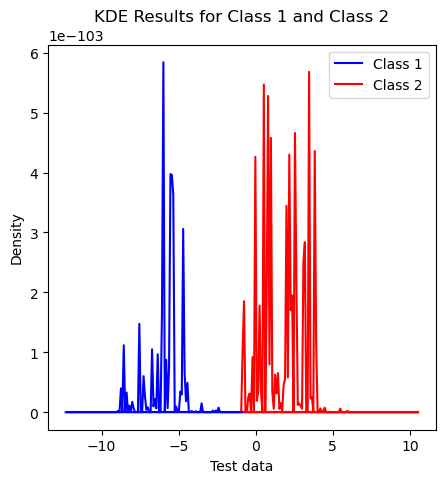

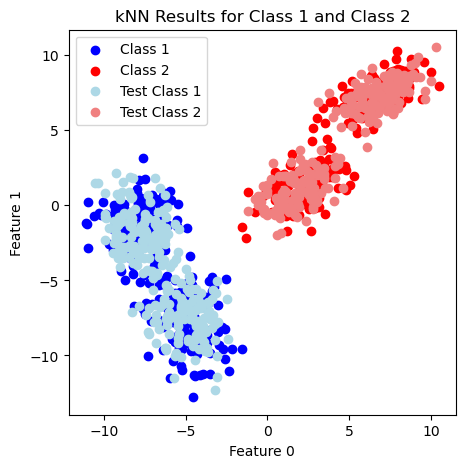

In [2]:
#code here
import numpy as np
import pandas as pd
from collections import Counter
import csv
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
"""
Sklearn library just used for comparing my results with sklearn results. I implemented my own functions
with using numpy and pandas.
"""
from sklearn.neighbors import KernelDensity, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# First i read files properly and get transpose of them.
class1_data = pd.read_csv('./Datasets/Part1/Class1.csv', header=0)
class2_data = pd.read_csv('./Datasets/Part1/Class2.csv', header=0)
test_data = pd.read_csv('./Datasets/Part1/test.csv', header=0)
class1_data = class1_data.drop(class1_data.columns[0], axis=1).T
class2_data = class2_data.drop(class2_data.columns[0], axis=1).T
test_data = test_data.drop(test_data.columns[0], axis=1).T

# I converted my datas to numpy arrays to make calculations easily.
class1_data = class1_data.to_numpy()
class2_data = class2_data.to_numpy()
test_data = test_data.to_numpy()

# Here is a generic gaussian kernel function
def gaussian_kernel(x_gauss, h):
    return (1 / ((2 * np.pi)**(x_gauss.shape[1] / 2))) * np.exp(-0.5 * np.sum(x_gauss**2, axis=-1) / h**2)

# I implemented my kde function to use kde method and make predictions according to Bayes.
def kde(data, x_kde, h):
    n = len(data)
    dim = data.shape[1]
    x_kde = np.expand_dims(x_kde, axis=0)
    return np.sum(gaussian_kernel((x_kde - data) / h, 1), axis=0) / (n * h**dim)

# Here is i calculated prior probabilities.
total_samples = len(class1_data) + len(class2_data)
P_C1 = len(class1_data) / total_samples
P_C2 = len(class2_data) / total_samples

# Function to calculate posterior probabilities.
def posterior(data, x_post, prior, kde_func, h):
    likelihood = kde_func(data, x_post, h)
    return likelihood * prior

# Function to make predictions according to knn.
def knn(data, labels, test_point, k):
    # Calculate Euclidean distance
    distances = np.sqrt(np.sum((data - test_point)**2, axis=1))
    indices = np.argsort(distances)[:k]  # indices of k nearest neighbors
    k_nearest_labels = [labels[j] for j in indices]  # labels of k nearest neighbors
    most_common = Counter(k_nearest_labels).most_common(1)  # most common label among k nearest neighbors
    return most_common[0][0]

# In this for loop i made predictions with kde.
kde_results = []
h1 = np.power(4/(3*len(class1_data)), 1/5)*np.std(class1_data)
h2 = np.power(4/(3*len(class2_data)), 1/5)*np.std(class2_data)

for x in test_data:
    x = np.reshape(x, (1, -1))  # Reshape x to match dimensions of data
    posterior_C1 = posterior(class1_data, x, P_C1, kde, h1)
    posterior_C2 = posterior(class2_data, x, P_C2, kde, h2)

    comparisons = [1 if c1 > c2 else 2 for c1, c2 in zip(posterior_C1, posterior_C2)]
    kde_results.append(max(set(comparisons), key=comparisons.count))

# Save results to csv file
with open('kde_results.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Id", "Class"])
    for i, res in enumerate(kde_results):
        writer.writerow([i, res])


# Create labels for the training data
class1_labels = [1]*len(class1_data)
class2_labels = [2]*len(class2_data)

# In here i combined data and labels
training_data = np.concatenate((class1_data, class2_data))
training_labels = np.concatenate((class1_labels, class2_labels))

# Then make predictions according to knn with this for loop.
knn_results = []
for x in test_data:
    x = np.reshape(x, (1, -1))  # Reshape x to match dimensions of data
    knn_results.append(knn(training_data, training_labels, x, 3))  # Using k=5 as an example

# Save kNN results to csv file
with open('knn_results.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Id", "Class"])
    for i, res in enumerate(knn_results):
        writer.writerow([i, res])

# I compared the result I got with my own implementations with the results that skitlearn library got.
# The result are idendical, so my implementations are great.
my_kde_results = pd.read_csv('kde_results.csv')
my_knn_results = pd.read_csv('knn_results.csv')

scaler = StandardScaler()
class1_data_scaled = scaler.fit_transform(class1_data)
class2_data_scaled = scaler.transform(class2_data)
test_data_scaled = scaler.transform(test_data)

training_data = np.concatenate((class1_data_scaled, class2_data_scaled))
training_labels = np.concatenate(([1]*len(class1_data_scaled), [2]*len(class2_data_scaled)))

kde_sklearn_class1 = KernelDensity(kernel='gaussian', bandwidth=h1).fit(class1_data_scaled)
kde_sklearn_class2 = KernelDensity(kernel='gaussian', bandwidth=h2).fit(class2_data_scaled)
probabilities_class1 = np.exp(kde_sklearn_class1.score_samples(test_data_scaled))
probabilities_class2 = np.exp(kde_sklearn_class2.score_samples(test_data_scaled))
kde_sklearn_results = np.where(probabilities_class1 > probabilities_class2, 1, 2)
print("Sklearn KDE Results match KDE results:", np.array_equal(my_kde_results['Class'].values, kde_sklearn_results))

knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(training_data, training_labels)
knn_sklearn_results = knn_sklearn.predict(test_data_scaled)
print("Sklearn kNN Results match kNN results:", np.array_equal(my_knn_results['Class'].values, knn_sklearn_results))

# In here i plot the density graph of data points with KDE prediction. In graph we can see our
# decision boundary too.
X_plot = np.linspace(test_data.min(), test_data.max(), len(class1_data))[:, np.newaxis]

# Get KDE results for each class.
kde_class1 = kde(class1_data, X_plot, h1)
kde_class2 = kde(class2_data, X_plot, h2)

# Create a color array based on which class has higher density.
colors = np.where(kde_class1 > kde_class2, 'blue', 'red')

# Plot KDE for class 1.
plt.figure(figsize=(5, 5))
plt.plot(X_plot, kde_class1, color='blue', label='Class 1')

# Plot KDE for class 2.
plt.plot(X_plot, kde_class2, color='red', label='Class 2')

# Create a collection of lines for the decision boundary and plot it.
points = np.array([X_plot.flatten(), np.zeros_like(X_plot.flatten())]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, colors=colors)
plt.gca().add_collection(lc)

plt.legend()
plt.title('KDE Results for Class 1 and Class 2')
plt.xlabel('Test data')
plt.ylabel('Density')
plt.show()


# And here, I plotted predicted data points with test data points according to knn predictions.
plt.figure(figsize=(5, 5))
# Scatter plot for class 1 and class 2 data points.
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')

# Highlight the test data points that were classified.
plt.scatter(test_data[my_knn_results['Class'] == 1, 0], test_data[my_knn_results['Class'] == 1, 1], color='lightblue', label='Test Class 1')
plt.scatter(test_data[my_knn_results['Class'] == 2, 0], test_data[my_knn_results['Class'] == 2, 1], color='lightcoral', label='Test Class 2')

plt.legend()
plt.title('kNN Results for Class 1 and Class 2')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

#### Note1: Don't forget add comments in your codes.
#### Note2: You should implement each part yourself without libraries such as scipy, scikit-learn, statsmodel. You can use functions from libraries like numpy, pandas etc. 